# Part 3 analysis

In [96]:
import pandas as pd
from colorama import Fore, Style, Back
import os
import seaborn as sns

In [2]:
data_df = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/dense_analysis_results.xlsx", sheet_name="raw data")
data_jats_df = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/dense_analysis_results_jats.xlsx", sheet_name="raw data")
data_multi_lang_df = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/dense_analysis_results_multi_lang.xlsx", sheet_name="raw data")
data_df.head(5)
data_jats_df.head(5)
#data_multi_lang_df.head(5)

,Unnamed: 0,Query,Precision,Recall,F1-Score,Accuracy,Balanced accuracy,Faithfulness score,Response
0,0,which studies examined the abstract in metadata?,0.822222,0.822222,0.822222,0.822222,0.550000,5,Summary answer: Only one study explicitly exam...
1,1,which studies examined citations?,0.866667,0.866667,0.866667,0.866667,0.662500,2,Summary answer: Several studies have examined ...
2,2,Tell me about OpenAlex.,0.777778,0.777778,0.777778,0.777778,0.518797,2,"Summary answer: OpenAlex is an emerging, inclu..."
3,3,Tell me about Crossref.,0.777778,0.777778,0.777778,0.777778,0.569444,2,Crossref is a key provider of open bibliograph...
4,4,Which papers evaluate the linguistic coverage ...,0.822222,0.822222,0.822222,0.822222,0.550000,3,Several papers evaluate the linguistic coverag...


# Precision
look at precision values across all three datasets

In [3]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Precision']].agg(['mean','max','min','std'])
data_df_grouped

Precision  ...     
                                                        mean  ...  std
Query                                                         ...     
How is RAG used to improve question answering o...  0.866667  ...  0.0
Tell me about Crossref.                             0.777778  ...  0.0
Tell me about OpenAlex.                             0.777778  ...  0.0
What are the key features and limitations of Op...  0.822222  ...  0.0
What are the main challenges in normalizing cit...  0.866667  ...  0.0
What are the strengths and weaknesses of Web of...  0.822222  ...  0.0
What is Crossref’s role in the scholarly resear...  0.866667  ...  0.0
What methods are used to detect and correct err...  0.866667  ...  0.0
Which papers address funding metadata, its avai...  0.822222  ...  0.0
Which papers discuss the use of Retrieval-Augme...  0.955556  ...  0.0
Which papers evaluate the linguistic coverage o...  0.822222  ...  0.0
tell me about how RAG works.                        0.777778  ...  0.0
which studies examined citations?                   0.866667  ...  0.0
which studies examined the abstract in metadata?    0.866667  ...  0.0

[14 rows x 4 columns]

In [5]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_precision = data_df[['Query', 'Precision']]
data_jats_df_precision = data_jats_df[['Query','Precision']]
data_multi_lang_df_precision = data_multi_lang_df[['Query','Precision']]
print(len(data_df_precision))
print(len(data_jats_df_precision))
data_combined_precision = data_df_precision.join(data_jats_df_precision, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query_jats', inplace=True)
data_combined_precision = data_combined_precision.join(data_multi_lang_df_precision, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_precision.drop(columns='Query', inplace=True)
data_combined_precision = data_combined_precision.rename(columns={'Query_data':'Query','Precision_data':'Precision_data','Precision_jats':'Precision_jats','Precision':'Precision_multi_lang'})

# save out
data_combined_precision.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_precision.xlsx")
data_combined_precision



70
70


,Query,Precision_data,Precision_jats,Precision_multi_lang
0,which studies examined the abstract in metadata?,0.866667,0.822222,0.822222
1,which studies examined citations?,0.866667,0.866667,0.822222
2,Tell me about OpenAlex.,0.777778,0.777778,0.733333
3,Tell me about Crossref.,0.777778,0.777778,0.822222
4,Which papers evaluate the linguistic coverage ...,0.822222,0.822222,0.777778
...,...,...,...,...
65,What are the strengths and weaknesses of Web o...,0.822222,0.822222,0.822222
66,How is RAG used to improve question answering ...,0.866667,0.866667,0.822222
67,What are the main challenges in normalizing ci...,0.866667,0.866667,0.911111
68,What methods are used to detect and correct er...,0.866667,0.866667,0.866667


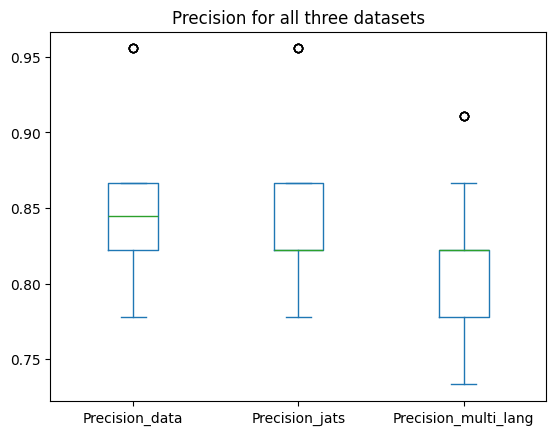

In [6]:
import matplotlib.pyplot as plt

data_combined_precision[['Precision_data','Precision_jats','Precision_multi_lang']].plot(kind='box',title='Precision for all three datasets')
plt.show()

In [7]:
# get mean, max, min
data_combined_precision_grouped = pd.DataFrame(data_combined_precision.groupby(data_combined_precision['Query'])[['Precision_data', 'Precision_jats','Precision_multi_lang']].agg('mean'))

data_combined_precision_data_avg = data_combined_precision_grouped['Precision_data'].mean()
data_combined_precision_data_jats_avg = data_combined_precision_grouped['Precision_jats'].mean()
data_combined_precision_data_multi_lang_avg = data_combined_precision_grouped['Precision_multi_lang'].mean()
print(f"Precision_data column mean: {data_combined_precision_data_avg:.4f}")
print(f"Precision_jats column mean: {data_combined_precision_data_jats_avg:.4f}")
print(f"Precision_multi_lang column mean: {data_combined_precision_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Precision_data':data_combined_precision_data_avg,
    'Precision_jats':data_combined_precision_data_jats_avg,
    'Precision_multi_lang':data_combined_precision_data_multi_lang_avg
}
precision_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{precision_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_precision_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_precision_grouped.xlsx")
precision_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/precision_grouped_means.xlsx")
data_combined_precision_grouped

Precision_data column mean: 0.8413
Precision_jats column mean: 0.8381
Precision_multi_lang column mean: 0.8190
   index  Precision_data  Precision_jats  Precision_multi_lang
0      0         0.84127        0.838095              0.819048


,Precision_data,Precision_jats,Precision_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.866667,0.866667,0.822222
Tell me about Crossref.,0.777778,0.777778,0.822222
Tell me about OpenAlex.,0.777778,0.777778,0.733333
What are the key features and limitations of OpenAlex as a bibliometric database?,0.822222,0.822222,0.777778
What are the main challenges in normalizing citation metrics across scientific fields?,0.866667,0.866667,0.911111
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.822222,0.822222,0.822222
What is Crossref’s role in the scholarly research ecosystem?,0.866667,0.866667,0.866667
What methods are used to detect and correct errors in bibliographic datasets?,0.866667,0.866667,0.866667
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.822222,0.822222,0.822222


# Recall scores

In [9]:
# precision
data_df_grouped = data_df.groupby(data_df['Query'])[['Recall']].agg(['mean','max','min','std'])
data_df_grouped

Recall  ...     
                                                        mean  ...  std
Query                                                         ...     
How is RAG used to improve question answering o...  0.866667  ...  0.0
Tell me about Crossref.                             0.777778  ...  0.0
Tell me about OpenAlex.                             0.777778  ...  0.0
What are the key features and limitations of Op...  0.822222  ...  0.0
What are the main challenges in normalizing cit...  0.866667  ...  0.0
What are the strengths and weaknesses of Web of...  0.822222  ...  0.0
What is Crossref’s role in the scholarly resear...  0.866667  ...  0.0
What methods are used to detect and correct err...  0.866667  ...  0.0
Which papers address funding metadata, its avai...  0.822222  ...  0.0
Which papers discuss the use of Retrieval-Augme...  0.955556  ...  0.0
Which papers evaluate the linguistic coverage o...  0.822222  ...  0.0
tell me about how RAG works.                        0.777778  ...  0.0
which studies examined citations?                   0.866667  ...  0.0
which studies examined the abstract in metadata?    0.866667  ...  0.0

[14 rows x 4 columns]

In [10]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_recall = data_df[['Query', 'Recall']]
data_jats_df_recall = data_jats_df[['Query','Recall']]
data_multi_lang_df_recall = data_multi_lang_df[['Query','Recall']]
print(len(data_df_recall))
print(len(data_jats_df_recall))
data_combined_recall = data_df_recall.join(data_jats_df_recall, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query_jats', inplace=True)
data_combined_recall = data_combined_recall.join(data_multi_lang_df_recall, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_recall.drop(columns='Query', inplace=True)
data_combined_recall = data_combined_recall.rename(columns={'Query_data':'Query','Recall_data':'Recall_data','Recall_jats':'Recall_jats','Recall':'Recall_multi_lang'})
data_combined_recall

70
70


,Query,Recall_data,Recall_jats,Recall_multi_lang
0,which studies examined the abstract in metadata?,0.866667,0.822222,0.822222
1,which studies examined citations?,0.866667,0.866667,0.822222
2,Tell me about OpenAlex.,0.777778,0.777778,0.733333
3,Tell me about Crossref.,0.777778,0.777778,0.822222
4,Which papers evaluate the linguistic coverage ...,0.822222,0.822222,0.777778
...,...,...,...,...
65,What are the strengths and weaknesses of Web o...,0.822222,0.822222,0.822222
66,How is RAG used to improve question answering ...,0.866667,0.866667,0.822222
67,What are the main challenges in normalizing ci...,0.866667,0.866667,0.911111
68,What methods are used to detect and correct er...,0.866667,0.866667,0.866667


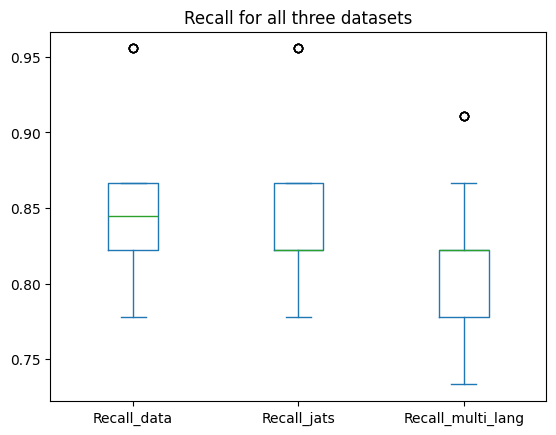

In [11]:
data_combined_recall[['Recall_data','Recall_jats','Recall_multi_lang']].plot(kind='box',title='Recall for all three datasets')
plt.show()

In [12]:
# get mean, max, min
data_combined_recall_grouped = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('mean'))

data_combined_recall_data_avg = data_combined_recall_grouped['Recall_data'].mean()
data_combined_recall_data_jats_avg = data_combined_recall_grouped['Recall_jats'].mean()
data_combined_recall_data_multi_lang_avg = data_combined_recall_grouped['Recall_multi_lang'].mean()
print(f"Recall_data column mean: {data_combined_recall_data_avg:.4f}")
print(f"Recall_jats column mean: {data_combined_recall_data_jats_avg:.4f}")
print(f"Recall_multi_lang column mean: {data_combined_recall_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Recall_data':data_combined_recall_data_avg,
    'Recall_jats':data_combined_recall_data_jats_avg,
    'Recall_multi_lang':data_combined_recall_data_multi_lang_avg
}
recall_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{recall_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_recall_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_recall_grouped.xlsx")
recall_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/recall_grouped_means.xlsx")
data_combined_recall_grouped

#data_combined_recall_median = pd.DataFrame(data_combined_recall.groupby(data_combined_recall['Query'])[['Recall_data', 'Recall_jats','Recall_multi_lang']].agg('median'))
#data_combined_recall_median

Recall_data column mean: 0.8413
Recall_jats column mean: 0.8381
Recall_multi_lang column mean: 0.8190
   index  Recall_data  Recall_jats  Recall_multi_lang
0      0      0.84127     0.838095           0.819048


,Recall_data,Recall_jats,Recall_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.866667,0.866667,0.822222
Tell me about Crossref.,0.777778,0.777778,0.822222
Tell me about OpenAlex.,0.777778,0.777778,0.733333
What are the key features and limitations of OpenAlex as a bibliometric database?,0.822222,0.822222,0.777778
What are the main challenges in normalizing citation metrics across scientific fields?,0.866667,0.866667,0.911111
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.822222,0.822222,0.822222
What is Crossref’s role in the scholarly research ecosystem?,0.866667,0.866667,0.866667
What methods are used to detect and correct errors in bibliographic datasets?,0.866667,0.866667,0.866667
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.822222,0.822222,0.822222


# F1 scores

In [13]:
# F1 scores
data_df_grouped = data_df.groupby(data_df['Query'])[['F1-Score']].agg(['mean','max','min','std'])
data_df_grouped

F1-Score  ...     
                                                        mean  ...  std
Query                                                         ...     
How is RAG used to improve question answering o...  0.866667  ...  0.0
Tell me about Crossref.                             0.777778  ...  0.0
Tell me about OpenAlex.                             0.777778  ...  0.0
What are the key features and limitations of Op...  0.822222  ...  0.0
What are the main challenges in normalizing cit...  0.866667  ...  0.0
What are the strengths and weaknesses of Web of...  0.822222  ...  0.0
What is Crossref’s role in the scholarly resear...  0.866667  ...  0.0
What methods are used to detect and correct err...  0.866667  ...  0.0
Which papers address funding metadata, its avai...  0.822222  ...  0.0
Which papers discuss the use of Retrieval-Augme...  0.955556  ...  0.0
Which papers evaluate the linguistic coverage o...  0.822222  ...  0.0
tell me about how RAG works.                        0.777778  ...  0.0
which studies examined citations?                   0.866667  ...  0.0
which studies examined the abstract in metadata?    0.866667  ...  0.0

[14 rows x 4 columns]

In [14]:
# combine all into one df and look at boxplot
#data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)
data_df_F1 = data_df[['Query', 'F1-Score']]
data_jats_df_F1 = data_jats_df[['Query','F1-Score']]
data_multi_lang_df_F1 = data_multi_lang_df[['Query','F1-Score']]
print(len(data_df_F1))
print(len(data_jats_df_F1))
data_combined_F1 = data_df_F1.join(data_jats_df_F1, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query_jats', inplace=True)
data_combined_F1 = data_combined_F1.join(data_multi_lang_df_F1, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_F1.drop(columns='Query', inplace=True)
data_combined_F1 = data_combined_F1.rename(columns={'Query_data':'Query','F1-Score_data':'F1-Score_data','F1-Score_jats':'F1-Score_jats','F1-Score':'F1-Score_multi_lang'})
data_combined_F1

70
70


,Query,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
0,which studies examined the abstract in metadata?,0.866667,0.822222,0.822222
1,which studies examined citations?,0.866667,0.866667,0.822222
2,Tell me about OpenAlex.,0.777778,0.777778,0.733333
3,Tell me about Crossref.,0.777778,0.777778,0.822222
4,Which papers evaluate the linguistic coverage ...,0.822222,0.822222,0.777778
...,...,...,...,...
65,What are the strengths and weaknesses of Web o...,0.822222,0.822222,0.822222
66,How is RAG used to improve question answering ...,0.866667,0.866667,0.822222
67,What are the main challenges in normalizing ci...,0.866667,0.866667,0.911111
68,What methods are used to detect and correct er...,0.866667,0.866667,0.866667


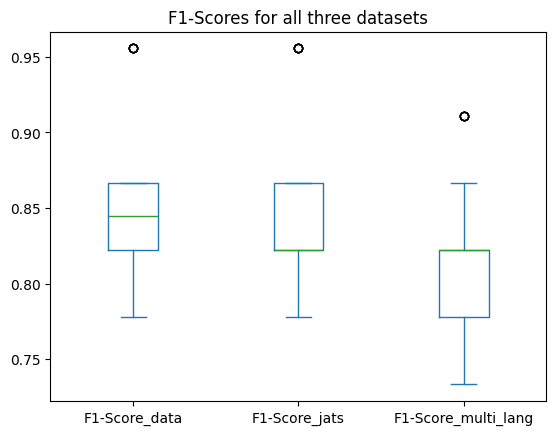

In [15]:
data_combined_F1[['F1-Score_data','F1-Score_jats','F1-Score_multi_lang']].plot(kind='box',title='F1-Scores for all three datasets')
plt.show()

In [16]:
# get mean, max, min
data_combined_F1_grouped = pd.DataFrame(data_combined_F1.groupby(data_combined_F1['Query'])[['F1-Score_data', 'F1-Score_jats','F1-Score_multi_lang']].agg('mean'))

data_combined_F1_data_avg = data_combined_F1_grouped['F1-Score_data'].mean()
data_combined_F1_data_jats_avg = data_combined_F1_grouped['F1-Score_jats'].mean()
data_combined_F1_data_multi_lang_avg = data_combined_F1_grouped['F1-Score_multi_lang'].mean()
print(f"F1_data column mean: {data_combined_F1_data_avg:.4f}")
print(f"F1_jats column mean: {data_combined_F1_data_jats_avg:.4f}")
print(f"F1_multi_lang column mean: {data_combined_F1_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'F1-Score_data':data_combined_F1_data_avg,
    'F1-Score_jats':data_combined_F1_data_jats_avg,
    'F1-Score_multi_lang':data_combined_F1_data_multi_lang_avg
}
F1_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{F1_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_F1_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_F1_grouped.xlsx")
F1_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/F1_grouped_means.xlsx")
data_combined_F1_grouped

F1_data column mean: 0.8413
F1_jats column mean: 0.8381
F1_multi_lang column mean: 0.8190
   index  F1-Score_data  F1-Score_jats  F1-Score_multi_lang
0      0        0.84127       0.838095             0.819048


,F1-Score_data,F1-Score_jats,F1-Score_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.866667,0.866667,0.822222
Tell me about Crossref.,0.777778,0.777778,0.822222
Tell me about OpenAlex.,0.777778,0.777778,0.733333
What are the key features and limitations of OpenAlex as a bibliometric database?,0.822222,0.822222,0.777778
What are the main challenges in normalizing citation metrics across scientific fields?,0.866667,0.866667,0.911111
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.822222,0.822222,0.822222
What is Crossref’s role in the scholarly research ecosystem?,0.866667,0.866667,0.866667
What methods are used to detect and correct errors in bibliographic datasets?,0.866667,0.866667,0.866667
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.822222,0.822222,0.822222


# Accuracy

In [17]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Accuracy  ...     
                                                        mean  ...  std
Query                                                         ...     
How is RAG used to improve question answering o...  0.866667  ...  0.0
Tell me about Crossref.                             0.777778  ...  0.0
Tell me about OpenAlex.                             0.777778  ...  0.0
What are the key features and limitations of Op...  0.822222  ...  0.0
What are the main challenges in normalizing cit...  0.866667  ...  0.0
What are the strengths and weaknesses of Web of...  0.822222  ...  0.0
What is Crossref’s role in the scholarly resear...  0.866667  ...  0.0
What methods are used to detect and correct err...  0.866667  ...  0.0
Which papers address funding metadata, its avai...  0.822222  ...  0.0
Which papers discuss the use of Retrieval-Augme...  0.955556  ...  0.0
Which papers evaluate the linguistic coverage o...  0.822222  ...  0.0
tell me about how RAG works.                        0.777778  ...  0.0
which studies examined citations?                   0.866667  ...  0.0
which studies examined the abstract in metadata?    0.866667  ...  0.0

[14 rows x 4 columns]

In [18]:
# combine all into one df and look at boxplot

data_df_accuracy = data_df[['Query', 'Accuracy']]
data_jats_df_accuracy = data_jats_df[['Query','Accuracy']]
data_multi_lang_df_accuracy = data_multi_lang_df[['Query','Accuracy']]
print(len(data_df_accuracy))
print(len(data_jats_df_accuracy))
data_combined_accuracy = data_df_accuracy.join(data_jats_df_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_accuracy = data_combined_accuracy.join(data_multi_lang_df_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_accuracy.drop(columns='Query', inplace=True)
data_combined_accuracy = data_combined_accuracy.rename(columns={'Query_data':'Query','Accuracy_data':'Accuracy_data','Accuracy_jats':'Accuracy_jats','Accuracy':'Accuracy_multi_lang'})
data_combined_accuracy

70
70


,Query,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
0,which studies examined the abstract in metadata?,0.866667,0.822222,0.822222
1,which studies examined citations?,0.866667,0.866667,0.822222
2,Tell me about OpenAlex.,0.777778,0.777778,0.733333
3,Tell me about Crossref.,0.777778,0.777778,0.822222
4,Which papers evaluate the linguistic coverage ...,0.822222,0.822222,0.777778
...,...,...,...,...
65,What are the strengths and weaknesses of Web o...,0.822222,0.822222,0.822222
66,How is RAG used to improve question answering ...,0.866667,0.866667,0.822222
67,What are the main challenges in normalizing ci...,0.866667,0.866667,0.911111
68,What methods are used to detect and correct er...,0.866667,0.866667,0.866667


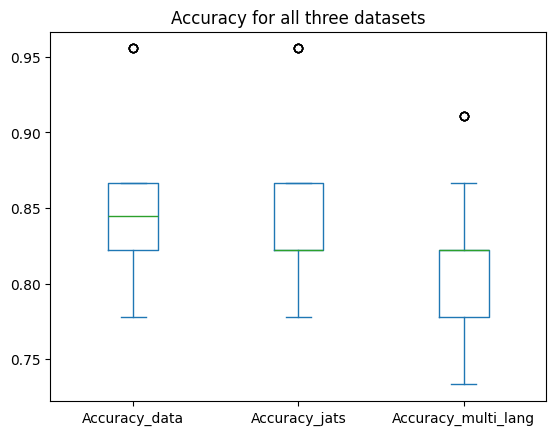

In [19]:
data_combined_accuracy[['Accuracy_data','Accuracy_jats','Accuracy_multi_lang']].plot(kind='box',title='Accuracy for all three datasets')
plt.show()

In [20]:
# get mean, max, min
data_combined_accuracy_grouped = pd.DataFrame(data_combined_accuracy.groupby(data_combined_accuracy['Query'])[['Accuracy_data', 'Accuracy_jats','Accuracy_multi_lang']].agg('mean'))

data_combined_accuracy_data_avg = data_combined_accuracy_grouped['Accuracy_data'].mean()
data_combined_accuracy_data_jats_avg = data_combined_accuracy_grouped['Accuracy_jats'].mean()
data_combined_accuracy_data_multi_lang_avg = data_combined_accuracy_grouped['Accuracy_multi_lang'].mean()
print(f"accuracy_data column mean: {data_combined_accuracy_data_avg:.4f}")
print(f"accuracy_jats column mean: {data_combined_accuracy_data_jats_avg:.4f}")
print(f"accuracy_multi_lang column mean: {data_combined_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Accuracy_data':data_combined_accuracy_data_avg,
    'Accuracy_jats':data_combined_accuracy_data_jats_avg,
    'Accuracy_multi_lang':data_combined_accuracy_data_multi_lang_avg
}
accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{accuracy_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_accuracy_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_accuracy_grouped.xlsx")
accuracy_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/accuracy_grouped_means.xlsx")
data_combined_accuracy_grouped

accuracy_data column mean: 0.8413
accuracy_jats column mean: 0.8381
accuracy_multi_lang column mean: 0.8190
   index  Accuracy_data  Accuracy_jats  Accuracy_multi_lang
0      0        0.84127       0.838095             0.819048


,Accuracy_data,Accuracy_jats,Accuracy_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.866667,0.866667,0.822222
Tell me about Crossref.,0.777778,0.777778,0.822222
Tell me about OpenAlex.,0.777778,0.777778,0.733333
What are the key features and limitations of OpenAlex as a bibliometric database?,0.822222,0.822222,0.777778
What are the main challenges in normalizing citation metrics across scientific fields?,0.866667,0.866667,0.911111
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.822222,0.822222,0.822222
What is Crossref’s role in the scholarly research ecosystem?,0.866667,0.866667,0.866667
What methods are used to detect and correct errors in bibliographic datasets?,0.866667,0.866667,0.866667
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.822222,0.822222,0.822222


# Balanced accuracy

In [21]:
# accuracy scores
data_df_grouped = data_df.groupby(data_df['Query'])[['Balanced accuracy']].agg(['mean','max','min','std'])
data_df_grouped

Balanced accuracy  ...     
                                                                mean  ...  std
Query                                                                 ...     
How is RAG used to improve question answering o...          0.662500  ...  0.0
Tell me about Crossref.                                     0.569444  ...  0.0
Tell me about OpenAlex.                                     0.518797  ...  0.0
What are the key features and limitations of Op...          0.550000  ...  0.0
What are the main challenges in normalizing cit...          0.662500  ...  0.0
What are the strengths and weaknesses of Web of...          0.550000  ...  0.0
What is Crossref’s role in the scholarly resear...          0.662500  ...  0.0
What methods are used to detect and correct err...          0.662500  ...  0.0
Which papers address funding metadata, its avai...          0.550000  ...  0.0
Which papers discuss the use of Retrieval-Augme...          0.887500  ...  0.0
Which papers evaluate the linguistic coverage o...          0.550000  ...  0.0
tell me about how RAG works.                                0.437500  ...  0.0
which studies examined citations?                           0.662500  ...  0.0
which studies examined the abstract in metadata?            0.662500  ...  0.0

[14 rows x 4 columns]

In [22]:
# combine into one df
data_df_bal_accuracy = data_df[['Query', 'Balanced accuracy']]
data_jats_df_bal_accuracy = data_jats_df[['Query','Balanced accuracy']]
data_multi_lang_df_bal_accuracy = data_multi_lang_df[['Query','Balanced accuracy']]
print(len(data_df_bal_accuracy))
print(len(data_jats_df_bal_accuracy))
data_combined_bal_accuracy = data_df_bal_accuracy.join(data_jats_df_bal_accuracy, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query_jats', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.join(data_multi_lang_df_bal_accuracy, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_bal_accuracy.drop(columns='Query', inplace=True)
data_combined_bal_accuracy = data_combined_bal_accuracy.rename(columns={'Query_data':'Query','Balanced accuracy_data':'Balanced accuracy_data','Balanced accuracy_jats':'Balanced accuracy_jats','Balanced accuracy':'Balanced accuracy_multi_lang'})
data_combined_bal_accuracy

70
70


,Query,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
0,which studies examined the abstract in metadata?,0.662500,0.550000,0.550000
1,which studies examined citations?,0.662500,0.662500,0.550000
2,Tell me about OpenAlex.,0.518797,0.518797,0.434211
3,Tell me about Crossref.,0.569444,0.569444,0.638889
4,Which papers evaluate the linguistic coverage ...,0.550000,0.550000,0.437500
...,...,...,...,...
65,What are the strengths and weaknesses of Web o...,0.550000,0.550000,0.550000
66,How is RAG used to improve question answering ...,0.662500,0.662500,0.550000
67,What are the main challenges in normalizing ci...,0.662500,0.662500,0.775000
68,What methods are used to detect and correct er...,0.662500,0.662500,0.662500


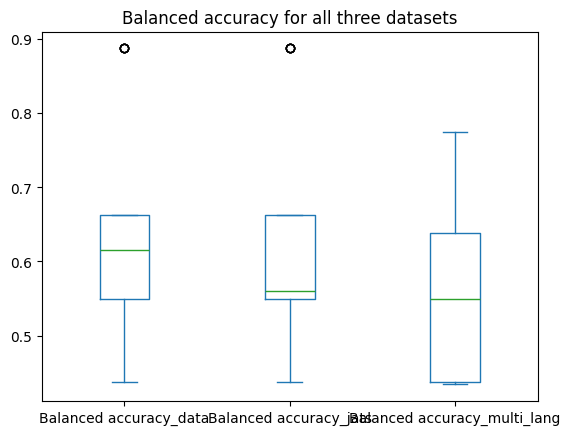

In [23]:
data_combined_bal_accuracy[['Balanced accuracy_data','Balanced accuracy_jats','Balanced accuracy_multi_lang']].plot(kind='box',title='Balanced accuracy for all three datasets')
plt.show()

In [24]:
# get mean, max, min
data_combined_bal_accuracy_grouped = pd.DataFrame(data_combined_bal_accuracy.groupby(data_combined_bal_accuracy['Query'])[['Balanced accuracy_data', 'Balanced accuracy_jats','Balanced accuracy_multi_lang']].agg('mean'))

data_combined_bal_accuracy_data_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_data'].mean()
data_combined_bal_accuracy_data_jats_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_jats'].mean()
data_combined_bal_accuracy_data_multi_lang_avg = data_combined_bal_accuracy_grouped['Balanced accuracy_multi_lang'].mean()
print(f"bal_accuracy_data column mean: {data_combined_bal_accuracy_data_avg:.4f}")
print(f"bal_accuracy_jats column mean: {data_combined_bal_accuracy_data_jats_avg:.4f}")
print(f"bal_accuracy_multi_lang column mean: {data_combined_bal_accuracy_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Balanced accuracy_data':data_combined_bal_accuracy_data_avg,
    'Balanced accuracy_jats':data_combined_bal_accuracy_data_jats_avg,
    'Balanced accuracy_multi_lang':data_combined_bal_accuracy_data_multi_lang_avg
}
bal_accuracy_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{bal_accuracy_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_bal_accuracy_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_bal_accuracy_grouped.xlsx")
bal_accuracy_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/bal_accuracy_grouped_means.xlsx")
data_combined_bal_accuracy_grouped

bal_accuracy_data column mean: 0.6134
bal_accuracy_jats column mean: 0.6054
bal_accuracy_multi_lang column mean: 0.5561
   index  ...  Balanced accuracy_multi_lang
0      0  ...                      0.556114

[1 rows x 4 columns]


,Balanced accuracy_data,Balanced accuracy_jats,Balanced accuracy_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,0.662500,0.662500,0.550000
Tell me about Crossref.,0.569444,0.569444,0.638889
Tell me about OpenAlex.,0.518797,0.518797,0.434211
What are the key features and limitations of OpenAlex as a bibliometric database?,0.550000,0.550000,0.437500
What are the main challenges in normalizing citation metrics across scientific fields?,0.662500,0.662500,0.775000
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,0.550000,0.550000,0.550000
What is Crossref’s role in the scholarly research ecosystem?,0.662500,0.662500,0.662500
What methods are used to detect and correct errors in bibliographic datasets?,0.662500,0.662500,0.662500
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",0.550000,0.550000,0.550000


# Faithfulness score


In [25]:
#Faithfulness score
data_df_grouped = data_df.groupby(data_df['Query'])[['Faithfulness score']].agg(['mean','max','min','std'])
data_df_grouped

Faithfulness score  ...          
                                                                 mean  ...       std
Query                                                                  ...          
How is RAG used to improve question answering o...                5.0  ...  0.000000
Tell me about Crossref.                                           3.0  ...  0.000000
Tell me about OpenAlex.                                           2.2  ...  0.447214
What are the key features and limitations of Op...                2.0  ...  0.000000
What are the main challenges in normalizing cit...                4.2  ...  0.447214
What are the strengths and weaknesses of Web of...                3.0  ...  0.000000
What is Crossref’s role in the scholarly resear...                5.0  ...  0.000000
What methods are used to detect and correct err...                3.6  ...  0.547723
Which papers address funding metadata, its avai...                3.0  ...  0.000000
Which papers discuss the use of Retrieval-Augme...                5.0  ...  0.000000
Which papers evaluate the linguistic coverage o...                3.2  ...  0.447214
tell me about how RAG works.                                      1.0  ...  2.236068
which studies examined citations?                                 3.2  ...  0.447214
which studies examined the abstract in metadata?                  2.6  ...  0.547723

[14 rows x 4 columns]

In [26]:
# combine into one df
data_df_faithfulness = data_df[['Query', 'Faithfulness score']]
data_jats_df_faithfulness = data_jats_df[['Query','Faithfulness score']]
data_multi_lang_df_faithfulness = data_multi_lang_df[['Query','Faithfulness score']]
print(len(data_df_faithfulness))
print(len(data_jats_df_faithfulness))
data_combined_faithfulness = data_df_faithfulness.join(data_jats_df_faithfulness, lsuffix='_data',rsuffix='_jats', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query_jats', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.join(data_multi_lang_df_faithfulness, rsuffix='multi_lang', validate='one_to_one').copy()
data_combined_faithfulness.drop(columns='Query', inplace=True)
data_combined_faithfulness = data_combined_faithfulness.rename(columns={'Query_data':'Query','Faithfulness score_data':'Faithfulness score_data','Faithfulness score_jats':'Faithfulness score_jats','Faithfulness score':'Faithfulness score_multi_lang'})
data_combined_faithfulness

70
70


,Query,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
0,which studies examined the abstract in metadata?,2,5,5
1,which studies examined citations?,3,2,5
2,Tell me about OpenAlex.,3,2,3
3,Tell me about Crossref.,3,2,5
4,Which papers evaluate the linguistic coverage ...,3,3,5
...,...,...,...,...
65,What are the strengths and weaknesses of Web o...,3,3,3
66,How is RAG used to improve question answering ...,5,5,3
67,What are the main challenges in normalizing ci...,4,5,5
68,What methods are used to detect and correct er...,3,3,3


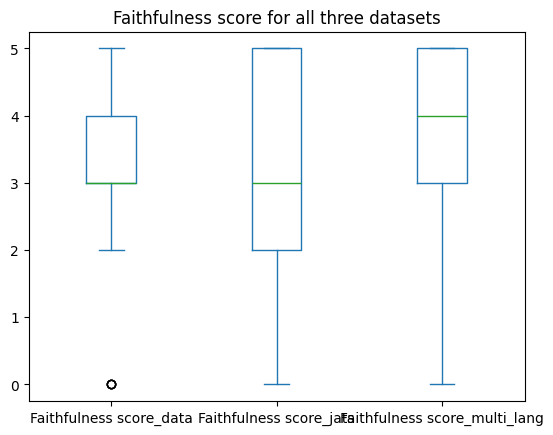

In [27]:
data_combined_faithfulness[['Faithfulness score_data','Faithfulness score_jats','Faithfulness score_multi_lang']].plot(kind='box',title='Faithfulness score for all three datasets')
plt.show()

In [28]:
# get mean, max, min
data_combined_faithfulness_grouped = pd.DataFrame(data_combined_faithfulness.groupby(data_combined_faithfulness['Query'])[['Faithfulness score_data', 'Faithfulness score_jats','Faithfulness score_multi_lang']].agg('mean'))

data_combined_faithfulness_data_avg = data_combined_faithfulness_grouped['Faithfulness score_data'].mean()
data_combined_faithfulness_data_jats_avg = data_combined_faithfulness_grouped['Faithfulness score_jats'].mean()
data_combined_faithfulness_data_multi_lang_avg = data_combined_faithfulness_grouped['Faithfulness score_multi_lang'].mean()
print(f"faithfulness_data column mean: {data_combined_faithfulness_data_avg:.4f}")
print(f"faithfulness_jats column mean: {data_combined_faithfulness_data_jats_avg:.4f}")
print(f"faithfulness_multi_lang column mean: {data_combined_faithfulness_data_multi_lang_avg:.4f}")

data = {
    'index':[0],
    'Faithfulness score_data':data_combined_faithfulness_data_avg,
    'Faithfulness score_jats':data_combined_faithfulness_data_jats_avg,
    'Faithfulness score_multi_lang':data_combined_faithfulness_data_multi_lang_avg
}
faithfulness_grouped_means = pd.DataFrame(data)
print(Fore.CYAN+f"{faithfulness_grouped_means}"+Style.RESET_ALL)

# save out
data_combined_faithfulness_grouped.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/data_combined_faithfulness_grouped.xlsx")
faithfulness_grouped_means.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/Round_2_dense_analysis_specter_embed/tables/faithfulness_grouped_means.xlsx")
data_combined_faithfulness_grouped

faithfulness_data column mean: 3.2857
faithfulness_jats column mean: 3.1571
faithfulness_multi_lang column mean: 3.6857
   index  ...  Faithfulness score_multi_lang
0      0  ...                       3.685714

[1 rows x 4 columns]


,Faithfulness score_data,Faithfulness score_jats,Faithfulness score_multi_lang
Query,,,
How is RAG used to improve question answering or information retrieval systems?,5.0,5.0,2.6
Tell me about Crossref.,3.0,2.6,5.0
Tell me about OpenAlex.,2.2,2.0,2.6
What are the key features and limitations of OpenAlex as a bibliometric database?,2.0,2.2,3.0
What are the main challenges in normalizing citation metrics across scientific fields?,4.2,5.0,5.0
What are the strengths and weaknesses of Web of Science (WoS) as a bibliometric database?,3.0,3.2,3.0
What is Crossref’s role in the scholarly research ecosystem?,5.0,3.0,5.0
What methods are used to detect and correct errors in bibliographic datasets?,3.6,3.0,3.4
"Which papers address funding metadata, its availability, or its analysis in scholarly databases?",3.0,5.0,3.4


# Documents score
* NOTE 
There are two cells below - make sure you run the correct one for your data


## The following cell only works for documents score data from the v5 notebook
** only run this one for part_3_Cohere_RAG.ipynb results **

In [85]:
# special one for testing documents soore on Part_3_Cohere_RAG v5 notebook
test_data = pd.read_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/dense_analysis_results.xlsx")

test_data_doc_score = pd.DataFrame(test_data['Documents score'])
test_data_doc_score

data_documents_score_df = pd.DataFrame(test_data['Documents score'])
data_jats_documents_score_df = pd.DataFrame(test_data['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(test_data['Documents score'])

print(test_data_doc_score.iloc[0,0].strip('[]'))
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: x.strip('[]'))

#data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x))
# Documents score
from ast import literal_eval
data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

#data_documents_score_df = pd.DataFrame(data_df['Documents score'])
#data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
#data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])
#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

(0.8692334294319153, '10.31222/osf.io/smxe5'), (0.8603118062019348, '10.1162/qss_a_00112'), (0.8595643639564514, '10.48550/arXiv.2406.15154'), (0.8534755706787109, '10.1162/qss_a_00286'), (0.8523948192596436, '10.48550/arXiv.2404.17663')
10
length of jats: 10
length of multi_lang: 10


,DOI,Score
0,10.31222/osf.io/smxe5,0.869233
0,10.1162/qss_a_00112,0.860312
0,10.48550/arXiv.2406.15154,0.859564
0,10.1162/qss_a_00286,0.853476
0,10.48550/arXiv.2404.17663,0.852395
1,10.48550/arXiv.2406.15154,0.845819
1,10.1162/qss_a_00112,0.844562
1,10.1371/journal.pbio.1002542,0.833207
1,10.48550/arXiv.2404.17663,0.819171
1,10.1162/qss_a_00286,0.817306


## The following cell is for the Part_3_V6_Cohere_RAG.ipynb
** skip if you ran the cell above **

In [83]:
# Documents score
from ast import literal_eval
data_df.head(5)
#data_jats_df.head(5)
#data_multi_lang_df.head(5)

data_documents_score_df = pd.DataFrame(data_df['Documents score'])
data_jats_documents_score_df = pd.DataFrame(data_jats_df['Documents score'])
data_multi_lang_documents_score_df = pd.DataFrame(data_multi_lang_df['Documents score'])
#read the strings as literals
data_documents_score_df['Documents score'] = data_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_jats_documents_score_df['Documents score'] = data_jats_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
data_multi_lang_documents_score_df['Documents score'] = data_multi_lang_documents_score_df['Documents score'].apply(lambda x: literal_eval(x) )
#explode nested lists into one column
data_documents_score_flatten = data_documents_score_df.explode(column='Documents score')
data_jats_documents_score_flatten = data_jats_documents_score_df.explode(column='Documents score')
data_multi_lang_documents_score_flatten = data_multi_lang_documents_score_df.explode(column='Documents score')
#separate tuple into columns
data_documents_exploded = pd.DataFrame()
data_documents_exploded[['Score','DOI']] = pd.DataFrame(data_documents_score_flatten['Documents score'].tolist(),index=data_documents_score_flatten.index)
print(len(data_documents_score_flatten))
cols = list(data_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_documents_exploded = data_documents_exploded[cols]
data_documents_exploded

#same again for jats dataset
data_jats_documents_exploded = pd.DataFrame()
data_jats_documents_exploded[['Score','DOI']] = pd.DataFrame(data_jats_documents_score_flatten['Documents score'].tolist(),index=data_jats_documents_score_flatten.index)
print(Fore.LIGHTGREEN_EX + f"length of jats: {len(data_jats_documents_score_flatten)}")
cols = list(data_jats_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_jats_documents_exploded = data_jats_documents_exploded[cols]
data_jats_documents_exploded

# and again for multi_lang dataset
data_multi_lang_documents_exploded = pd.DataFrame()
data_multi_lang_documents_exploded[['Score','DOI']] = pd.DataFrame(data_multi_lang_documents_score_flatten['Documents score'].tolist(),index=data_multi_lang_documents_score_flatten.index)
print(Fore.LIGHTCYAN_EX + f"length of multi_lang: {len(data_multi_lang_documents_score_flatten)}")
cols = list(data_multi_lang_documents_exploded.columns)
cols = cols[1::2] + cols[::2]
data_multi_lang_documents_exploded = data_multi_lang_documents_exploded[cols]
data_multi_lang_documents_exploded

10
length of jats: 10
length of multi_lang: 10


,DOI,Score
0,0.869233,10.31222/osf.io/smxe5
0,0.860312,10.1162/qss_a_00112
0,0.859564,10.48550/arXiv.2406.15154
0,0.853476,10.1162/qss_a_00286
0,0.852395,10.48550/arXiv.2404.17663
1,0.845819,10.48550/arXiv.2406.15154
1,0.844562,10.1162/qss_a_00112
1,0.833207,10.1371/journal.pbio.1002542
1,0.819171,10.48550/arXiv.2404.17663
1,0.817306,10.1162/qss_a_00286


In [88]:
# create a df with all mean scores for each DOI
data_documents_score_grouped = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI'])['Score'].agg(['mean']))
data_documents_score_grouped = data_documents_score_grouped.sort_values('mean',ascending=False)
data_documents_score_grouped

data_jats_documents_score_grouped = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI'])['Score'].agg(['mean']))
data_jats_documents_score_grouped

data_multi_lang_documents_score_grouped = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI'])['Score'].agg(['mean']))
data_multi_lang_documents_score_grouped
# reset index so that DOI is a proper column
data_documents_score_grouped.reset_index(inplace=True,drop=False)
data_jats_documents_score_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_grouped.reset_index(inplace=True,drop=False)


data_documents_score_grouped_together = data_documents_score_grouped.merge(data_jats_documents_score_grouped,left_on='DOI',right_on='DOI')
data_documents_score_grouped_together = data_documents_score_grouped_together.merge(data_multi_lang_documents_score_grouped, left_on='DOI', right_on='DOI')
data_documents_score_grouped_together.rename(inplace=True, columns={'DOI':'DOI',
                                                                    'mean_x':'data_mean',
                                                                    'mean_y':'jats_mean',
                                                                    'mean':'multi_lang_mean'})

# save out
data_documents_score_grouped_together.to_excel("/Users/poppyriddle/Documents/PhD/Research_proposal/Part_3/part_3_cohere/analysis/tables/data_documents_score_grouped_together.xlsx")

data_documents_score_grouped_together

,DOI,data_mean,jats_mean,multi_lang_mean
0,10.31222/osf.io/smxe5,0.869233,0.869233,0.869233
1,10.48550/arXiv.2406.15154,0.852691,0.852691,0.852691
2,10.1162/qss_a_00112,0.852437,0.852437,0.852437
3,10.48550/arXiv.2404.17663,0.835783,0.835783,0.835783
4,10.1162/qss_a_00286,0.835391,0.835391,0.835391
5,10.1371/journal.pbio.1002542,0.833207,0.833207,0.833207


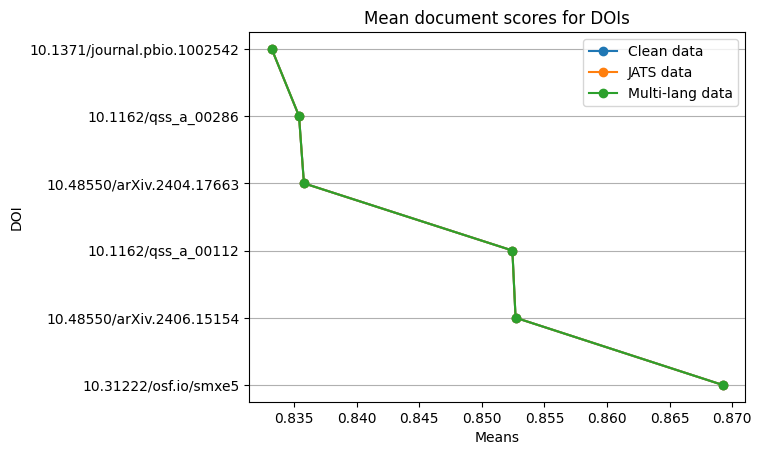

In [100]:
fig,ax = plt.subplots()
plt.plot(data_documents_score_grouped_together[['data_mean','jats_mean','multi_lang_mean']],
        data_documents_score_grouped_together['DOI'],
        marker='o',
        linestyle='-',data=data_documents_score_grouped_together)
plt.xlabel('Means')
plt.ylabel('DOI')
plt.title("Mean document scores for DOIs")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='upper right')
plt.grid(visible=True,axis='y')
plt.show()

In [93]:
# join the sets together:data_documents_exploded, data_jats_documents_exploded, data_multi_lang_documents_exploded

data_combined_doc_score = data_documents_exploded.merge(data_jats_documents_exploded, left_on='DOI', right_on='DOI', how='inner', suffixes=('_data','_jats'))
data_combined_doc_score = data_combined_doc_score.merge(data_multi_lang_documents_exploded, on='DOI', how='inner')
data_combined_doc_score = data_combined_doc_score.rename(columns={'DOI':'DOI',
                                                            'Score_data':'Score_data',
                                                            'Score_jats':'Score_jats',
                                                            'Score':'Score_multi_lang'})
data_combined_doc_score
# reset index 

,DOI,Score_data,Score_jats,Score_multi_lang
0,10.31222/osf.io/smxe5,0.869233,0.869233,0.869233
1,10.1162/qss_a_00112,0.860312,0.860312,0.860312
2,10.1162/qss_a_00112,0.860312,0.860312,0.844562
3,10.1162/qss_a_00112,0.860312,0.844562,0.860312
4,10.1162/qss_a_00112,0.860312,0.844562,0.844562
5,10.48550/arXiv.2406.15154,0.859564,0.859564,0.859564
6,10.48550/arXiv.2406.15154,0.859564,0.859564,0.845819
7,10.48550/arXiv.2406.15154,0.859564,0.845819,0.859564
8,10.48550/arXiv.2406.15154,0.859564,0.845819,0.845819
9,10.1162/qss_a_00286,0.853476,0.853476,0.853476


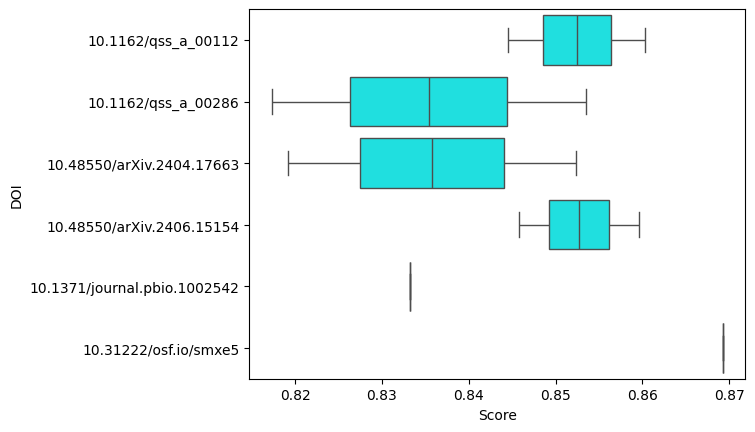

In [102]:
# count of DOIs - how is this different than golden set
data_documents_score_count = pd.DataFrame(data_documents_exploded.groupby(data_documents_exploded['DOI']).count())
data_documents_score_count = data_documents_score_count.sort_values('Score',ascending=False)

#save out
#data_documents_score_count.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/data_documents_score_count.xlsx")

data_documents_score_count

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# **********  SET THE FILTER TO AN APPROPRIATE AMOUNT *************
data_documents_score_count_top = data_documents_score_count[data_documents_score_count['Score']>=1]
data_documents_score_count_top.reset_index(inplace=True,drop=False)
data_documents_score_count_top_merged = data_documents_score_count_top.merge(data_documents_exploded, on='DOI', how='left')
data_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_documents_score_count_top_merged['Score'],
            y=data_documents_score_count_top_merged['DOI'],
            data=data_documents_score_count_top_merged,
            color='cyan',)
plt.show()

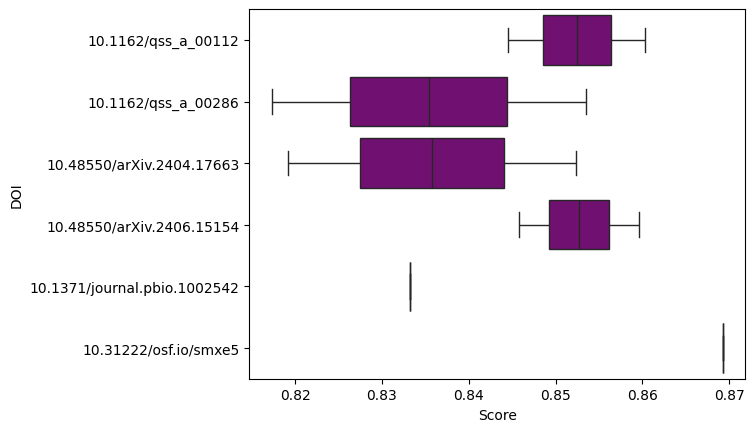

In [103]:
# let's do the same for JATS-tagged dataset
#data_jats_documents_exploded
# count of DOIs - how is this different than golden set
data_jats_documents_score_count = pd.DataFrame(data_jats_documents_exploded.groupby(data_jats_documents_exploded['DOI']).count())
data_jats_documents_score_count = data_jats_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# ************* SET THE FILTER LIMIT ************
data_jats_documents_score_count_top = data_jats_documents_score_count[data_jats_documents_score_count['Score']>=1]
data_jats_documents_score_count_top.reset_index(inplace=True,drop=False)
data_jats_documents_score_count_top_merged = data_jats_documents_score_count_top.merge(data_jats_documents_exploded, on='DOI', how='left')
data_jats_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_jats_documents_score_count_top_merged['Score'],
            y=data_jats_documents_score_count_top_merged['DOI'],
            data=data_jats_documents_score_count_top_merged,
            color='purple',)
plt.show()

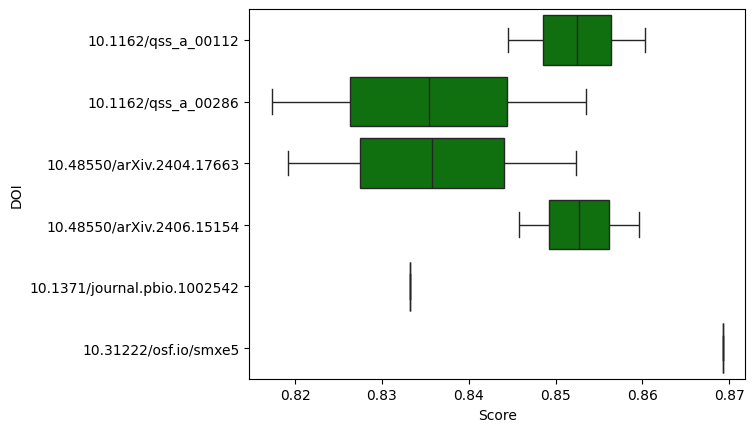

In [104]:
# let's do the same for multilingual dataset
#data_multi_lang_documents_exploded
# count of DOIs - how is this different than golden set
data_multi_lang_documents_score_count = pd.DataFrame(data_multi_lang_documents_exploded.groupby(data_multi_lang_documents_exploded['DOI']).count())
data_multi_lang_documents_score_count = data_multi_lang_documents_score_count.sort_values('Score',ascending=False)

# now let's look at only those with counts of DOIs 15 or higher - this may produce a better boxplot
# *********** SET THE FILTER LIMIT **********
data_multi_lang_documents_score_count_top = data_multi_lang_documents_score_count[data_multi_lang_documents_score_count['Score']>=1]
data_multi_lang_documents_score_count_top.reset_index(inplace=True,drop=False)
data_multi_lang_documents_score_count_top_merged = data_multi_lang_documents_score_count_top.merge(data_multi_lang_documents_exploded, on='DOI', how='left')
data_multi_lang_documents_score_count_top_merged.rename(columns={'DOI':'DOI','Score_x':'Count','Score_y':'Score'},inplace=True)

sns.boxplot(x=data_multi_lang_documents_score_count_top_merged['Score'],
            y=data_multi_lang_documents_score_count_top_merged['DOI'],
            data=data_multi_lang_documents_score_count_top_merged,
            color='green',)
plt.show()

# Response analysis


In [159]:
# read in data
data_response = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_answer_relevance_results_data.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_jats_response = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_answer_relevance_results_data_jats.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
data_multi_lang_response = pd.read_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/dense_answer_relevance_results_data_multi_lang.xlsx", sheet_name='raw data',usecols="B,D", names=['Query','Answer relevance'])
print(f"Len multi_lang: {len(data_multi_lang_response)}")
print(f"Len jats: {len(data_jats_response)}")
print(f"Len data: {len(data_response)}")



Len multi_lang: 70
Len jats: 70
Len data: 70


In [173]:
data_response_grouped = pd.DataFrame(data_response.groupby(data_response['Query'])['Answer relevance'].agg('mean'))
data_response_grouped.reset_index(inplace=True,drop=False)
data_response_grouped

data_jats_response_grouped = pd.DataFrame(data_jats_response.groupby(data_jats_response['Query'])['Answer relevance'].agg('mean'))
data_jats_response_grouped.reset_index(inplace=True,drop=False)
data_jats_response_grouped

data_multi_lang_response_grouped = pd.DataFrame(data_multi_lang_response.groupby(data_multi_lang_response['Query'])['Answer relevance'].agg('mean'))
data_multi_lang_response_grouped.reset_index(inplace=True,drop=False)
data_multi_lang_response_grouped

response_grouped_together = data_response_grouped.merge(data_jats_response_grouped,on='Query')
response_grouped_together = response_grouped_together.merge(data_multi_lang_response_grouped,on='Query')
response_grouped_together.rename(inplace=True,columns={'Query':'Query',
                                                        'Answer relevance_x':'Relevance_data',
                                                        'Answer relevance_y':'Relevance_jats',
                                                        'Answer relevance':'Relevance_multi_lang'})
#save out
response_grouped_together.to_excel("/Users/poppyriddle/Documents/Github/Research_proposal/part_3_cohere/analysis/tables/response_grouped_together.xlsx")
response_grouped_together

,Query,Relevance_data,Relevance_jats,Relevance_multi_lang
0,How is RAG used to improve question answering ...,0.2,0.8,1.0
1,Tell me about Crossref.,1.0,0.6,0.8
2,Tell me about OpenAlex.,0.6,1.0,1.0
3,What are the key features and limitations of O...,0.8,1.0,1.0
4,What are the main challenges in normalizing ci...,0.8,0.4,1.0
5,What are the strengths and weaknesses of Web o...,0.2,0.0,0.2
6,What is Crossref’s role in the scholarly resea...,0.4,0.6,1.0
7,What methods are used to detect and correct er...,1.0,1.0,0.6
8,"Which papers address funding metadata, its ava...",1.0,0.8,0.8
9,Which papers discuss the use of Retrieval-Augm...,0.8,1.0,1.0


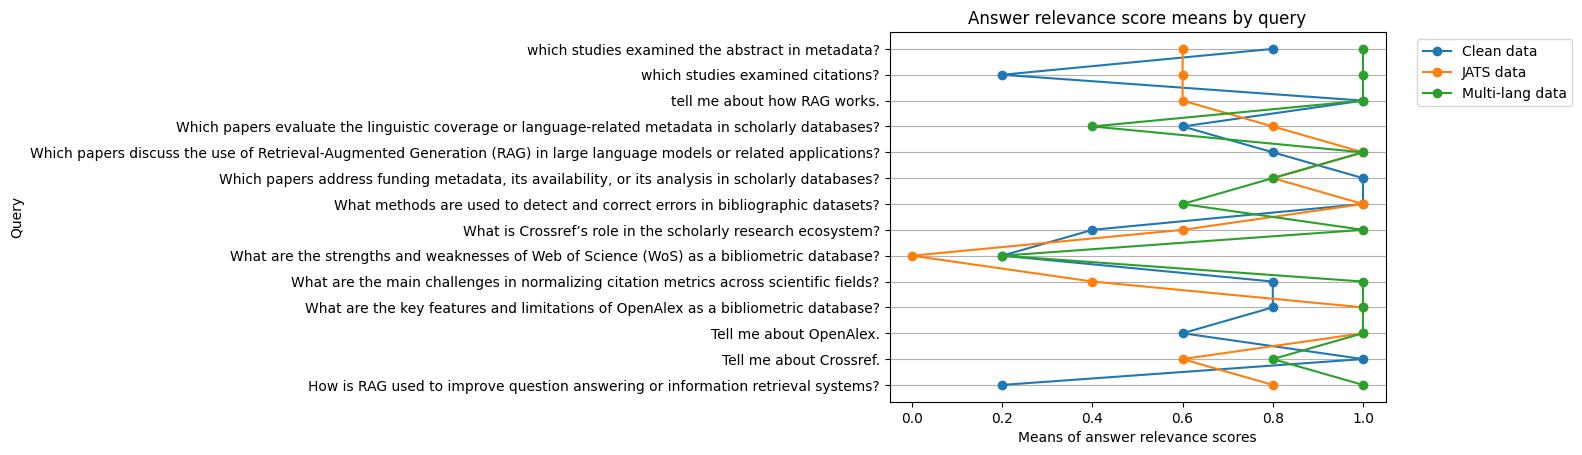

In [172]:
# let's see a plot of these values
fig,ax = plt.subplots()
plt.plot(response_grouped_together[['Relevance_data','Relevance_jats','Relevance_multi_lang']],
        response_grouped_together['Query'],
        marker='o',
        linestyle='-',data=response_grouped_together)
plt.xlabel('Means of answer relevance scores')
plt.ylabel('Query')
plt.title("Answer relevance score means by query")
ax.legend(('Clean data', 'JATS data', 'Multi-lang data'), loc='best', bbox_to_anchor=(1.05,1))
plt.grid(visible=True,axis='y')
plt.show()